
# data wrangling process

In [1]:
#importing the neccessary modules

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading the dataset

df=pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



# data cleaning process

In [3]:
df.director.value_counts()

Woody Allen                 45
Clint Eastwood              34
Martin Scorsese             29
Steven Spielberg            29
Ridley Scott                23
                            ..
Jeffrey Porter               1
Larry Shaw                   1
Bill Pohlad                  1
Andy Hamilton|Guy Jenkin     1
Harold P. Warren             1
Name: director, Length: 5067, dtype: int64

In [4]:
#checking the datatpe of the columns

df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
#converting the release date column to datetime datatype

df["release_date"]=pd.to_datetime(df["release_date"])

In [6]:
#converting the budget adj column from float to int data type

df["budget_adj"]=df["budget_adj"].astype("int")

In [7]:
#converting the release adj column from float to int data type

df["revenue_adj"]=df["revenue_adj"].astype("int")

In [8]:
#renaming the budget_adj column

df=df.rename(columns = {'budget_adj' : 'net_budget'})

In [9]:
#renaming the revenue_adj column

df=df.rename(columns = {'revenue_adj' : 'net_revenue'})

In [10]:
#checking for duplicated rows 

df.duplicated().sum()

1

In [11]:
# dropping duplicate rows

df.drop_duplicates(inplace=True)

In [12]:
#checking for null values

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
net_budget                 0
net_revenue                0
dtype: int64

In [13]:
# dropping some of the columns because of the large amount of missing data and insignificance
df.drop(['homepage','tagline','keywords','overview','production_companies','imdb_id','id','cast',],axis=1,inplace=True)



# Exploratory data analysis

In [14]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,net_budget,net_revenue
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445892
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939,348161292
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955,271619025
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919,1902723129
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174799923,1385748801


QUESTION 1 : how many rows and columns are contained in the cleaned dataset

In [15]:
df.shape

(10865, 13)

there are 10865 rows contained in the cleaned dataset and 13 columns

QUESTION 2 : how is the distribution of the average votes values

<AxesSubplot:ylabel='Frequency'>

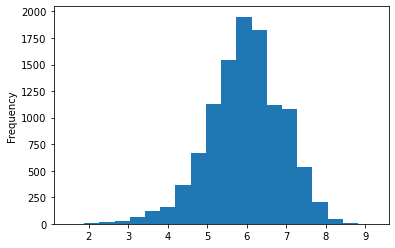

In [16]:
df['vote_average'].plot(kind="hist",bins=20)

the distribution is skewed to the left 

QUESTION 3 : how is the distribution of the released year values

<AxesSubplot:ylabel='Frequency'>

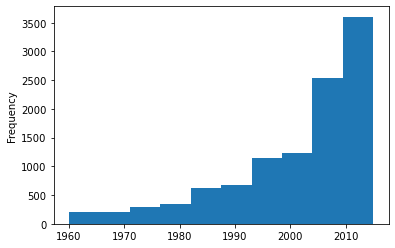

In [17]:
df['release_year'].plot(kind="hist")

the number of movies made increases by year

QUESTION 4 : how is the distribution of the runtime values

<AxesSubplot:>

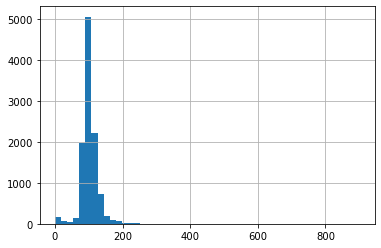

In [18]:
#what kind of distribution does the runtime coulmn has?

df.runtime.hist(bins=50)

the runtime column has a uniform distribution

 QUESTION 5: what kind of movie length occurs mostly?

In [19]:
#getting more info about the runtime

df.runtime.describe()

count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [20]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [ 0.0,90 ,111.00 ,900]

In [21]:
# Labels for the 3 movie length groups
bin_names = [ 'short','decent' ,'long' ]

In [22]:
#creating the movie length column

df['movie_length'] = pd.cut(df['runtime'], bin_edges, labels=bin_names)

df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,net_budget,net_revenue,movie_length
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445892,long
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939,348161292,long
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955,271619025,long
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919,1902723129,long
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174799923,1385748801,long


In [23]:
#the count of the movie lengths

df.movie_length.value_counts()

decent    5193
short     2931
long      2710
Name: movie_length, dtype: int64

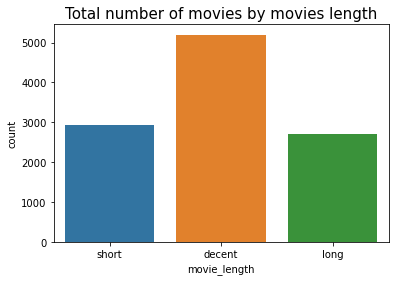

In [24]:
# making a counplot of the movie length

sns.countplot(x='movie_length', data=df)
plt.title('Total number of movies by movies length', fontsize=15);

the most common type of movie length is the one within 90 minutes to 111 minutes

QUESTION 6 : what movie length has the highest average revenue?

In [25]:
#getting the mean gross revenue by movie_length

mv_length_avg_revenue=df.groupby('movie_length').revenue.mean()
mv_length_avg_revenue

movie_length
short     1.300994e+07
decent    3.132690e+07
long      8.557436e+07
Name: revenue, dtype: float64

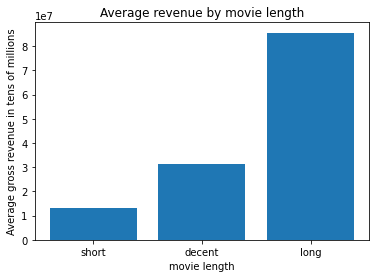

In [26]:
#visualizing the average gross revenue

locations = [1, 2, 3]
heights = mv_length_avg_revenue
labels = ['short', 'decent','long']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average revenue by movie length')
plt.xlabel('movie length')
plt.ylabel('Average gross revenue in tens of millions');

the longer movies average more revenue than the other length

QUESTION 7: who are the top ten directors by movie count?

In [27]:
top_directors=df.director.value_counts().nlargest(10)
top_directors

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Name: director, dtype: int64

QUESTION 8: what are the top 10 movies with the highest budget

In [28]:
#sorting the revenue in an ascending order
df_budget=df.sort_values('budget', ascending=False)

In [29]:
#looking at the top 10 movies with the highest budget

top_budget=df_budget[['budget','original_title']].head(10)
top_budget

,budget,original_title
2244,425000000,The Warrior's Way
3375,380000000,Pirates of the Caribbean: On Stranger Tides
7387,300000000,Pirates of the Caribbean: At World's End
14,280000000,Avengers: Age of Ultron
6570,270000000,Superman Returns
4411,260000000,John Carter
1929,260000000,Tangled
7394,258000000,Spider-Man 3
5508,255000000,The Lone Ranger
4367,250000000,The Hobbit: An Unexpected Journey


Text(0, 0.5, 'budget')

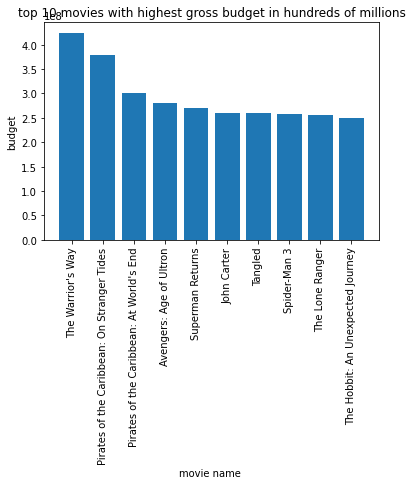

In [30]:
#creating a bar chart to represent the top budget movies
locations =top_budget.original_title
heights = top_budget.budget

plt.bar(locations, heights)
plt.title('top 10 movies with highest gross budget in hundreds of millions')
plt.xticks(rotation=90)
plt.xlabel('movie name ')
plt.ylabel('budget')

QUESTION 9: what are the five most common genres

<AxesSubplot:>

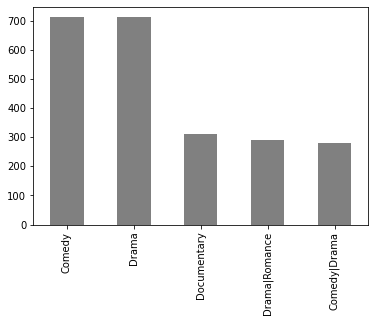

In [31]:
common_genre=df['genres'].value_counts().nlargest(5).plot(kind="bar",color='grey')
common_genre

QUESTION 10: what is the relationship between popularity and vote count

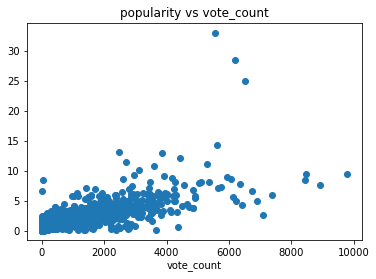

In [32]:
#creating a scatter plot of popularity vs vote count 

plt.scatter(x=df['vote_count'], y=df['popularity']);
plt.title('popularity vs vote_count')
plt.xlabel('vote_count')

plt.show()

<AxesSubplot:xlabel='vote_count', ylabel='popularity'>

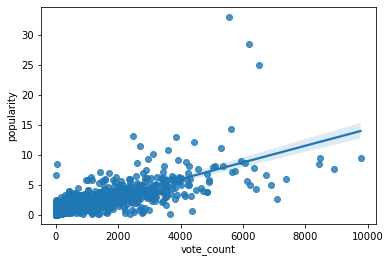

In [33]:
sns.regplot(x='vote_count',y='popularity',data=df)

there is a positive relationship between vote count and popularity

QUESTION 10: what is the relationship between gross budget and gross revenue

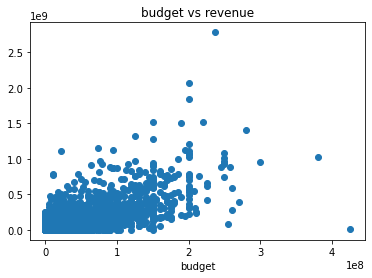

In [34]:
#creating a scatter plot of gross budget vs gross revenue 

plt.scatter(x=df['budget'], y=df['revenue']);
plt.title('budget vs revenue')
plt.xlabel('budget')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='revenue'>

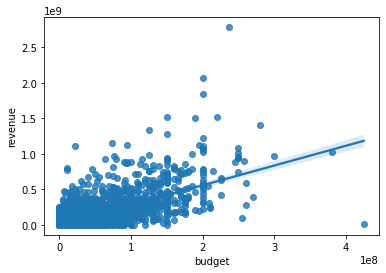

In [35]:
sns.regplot(x='budget',y='revenue',data=df)

the relationship between budget and revenue is a positive one

QUESTION 11: what is the gross profit made?

In [36]:
#creating a profit dataframe

df['profit']=df['revenue']-df['budget']
df['profit']

0        1363528810
1         228436354
2         185238201
3        1868178225
4        1316249360
            ...    
10861             0
10862             0
10863             0
10864             0
10865        -19000
Name: profit, Length: 10865, dtype: int64

In [37]:
#looking at the correlation in the dataset
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,net_budget,net_revenue,profit
popularity,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.089806,0.513555,0.538400,0.628997
budget,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.115904,0.968963,0.591342,0.570222
revenue,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.057070,0.706446,0.781140,0.976162
runtime,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,-0.117187,0.221127,0.159571,0.136022
vote_count,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.107962,0.587062,0.621352,0.755908
vote_average,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,-0.117576,0.093079,0.177510,0.183067
release_year,0.089806,0.115904,0.057070,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.055894,0.032038
net_budget,0.513555,0.968963,0.706446,0.221127,0.587062,0.093079,0.016771,1.000000,0.608957,0.545654
net_revenue,0.538400,0.591342,0.781140,0.159571,0.621352,0.177510,-0.055894,0.608957,1.000000,0.756995
profit,0.628997,0.570222,0.976162,0.136022,0.755908,0.183067,0.032038,0.545654,0.756995,1.000000


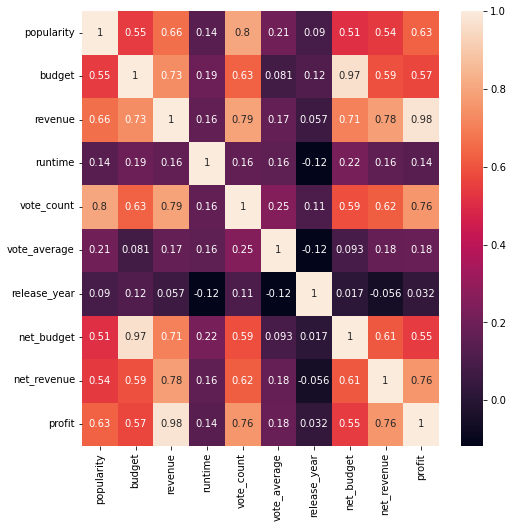

In [38]:
corr_matrix=df.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

# CONCLUSION

1. we can see that there is an overall uptrend in the amount of movies made yearly

2. majority of the movies produced are within 90 minutes and 111 minutes

3. movies with long duration generates mre revenue

4. there is a strong positive correlation between popularity and vote count

5. the comedy and drama genre are the most produced movies

